# **ORIGINAL update merge part4**

# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [5]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [7]:
## load dataset here
df = pd.read_csv("icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [8]:
## parsing data here
images, labels = parse_data(df)


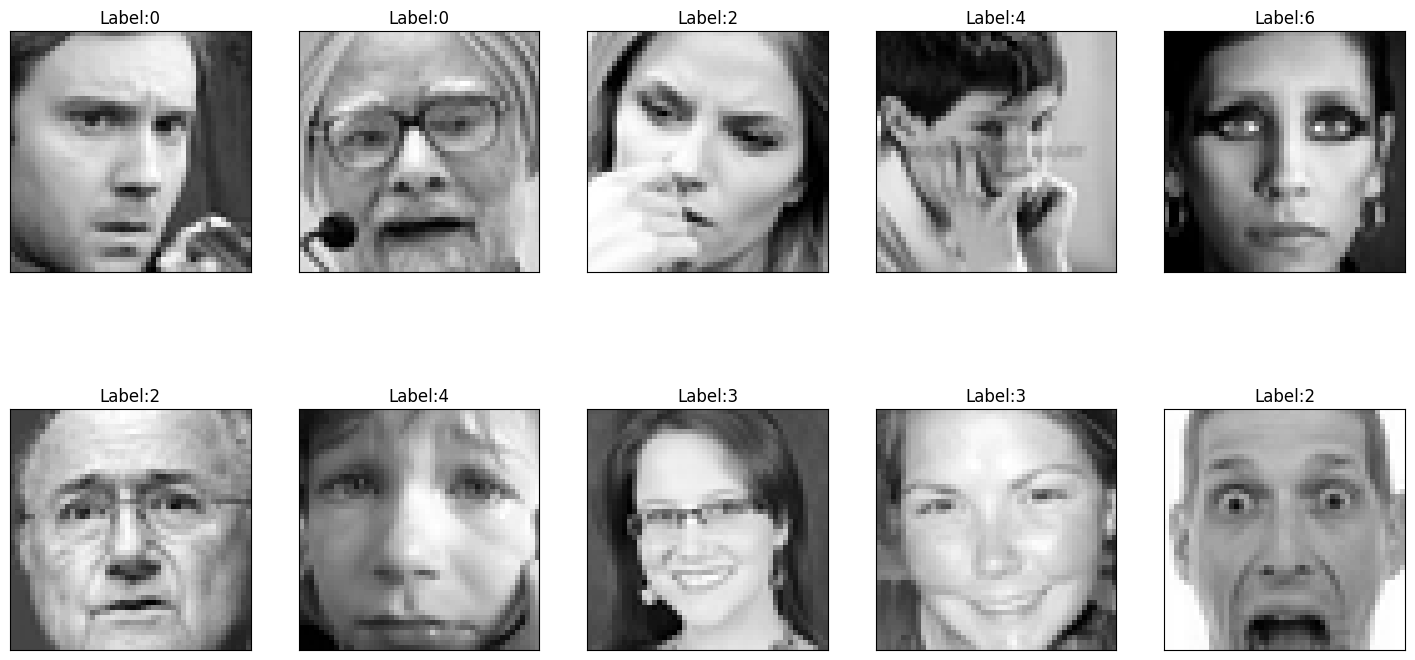

In [9]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

### **Question 1**: Can you visualize the data projected onto two principal components? (2 points)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#chuẩn hóa ảnh và trả về ảnh đã được chuẩn hóa sau khi giảm chiều
def pca_scale(images: np.ndarray):
    result = np.zeros(shape=(len(images), 48, 48))
    for i in range(len(images)):
        scaler = MinMaxScaler()
        im_scaled = scaler.fit_transform(images[i])
        pca = PCA(n_components=2)
        im_pca = pca.fit_transform(im_scaled)
        im_pca_inverse = pca.inverse_transform(im_pca)
        im_pca_inverse_scale = scaler.inverse_transform(im_pca_inverse)
        result[i] = im_pca_inverse_scale
    return result

images_pca = pca_scale(images)

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  expla

In [11]:
images_pca.shape

(35887, 48, 48)

In [12]:
images_pca[0]

array([[69.92227962, 69.47159956, 71.33778399, ..., 71.14179395,
        70.10387667, 65.2483088 ],
       [52.82102463, 50.60910656, 55.80038396, ..., 65.73699948,
        65.00483841, 57.84521128],
       [45.32619627, 43.96838786, 51.78460612, ..., 62.29432873,
        61.49049457, 53.47582562],
       ...,
       [54.46648954, 41.03399338, 37.72576861, ..., 73.78007391,
        74.4592373 , 66.43735762],
       [53.01114232, 36.2590694 , 30.9575554 , ..., 75.41367232,
        76.51979537, 68.00018867],
       [59.7630483 , 45.02639604, 39.36004239, ..., 76.67570742,
        77.49413687, 70.00984138]])

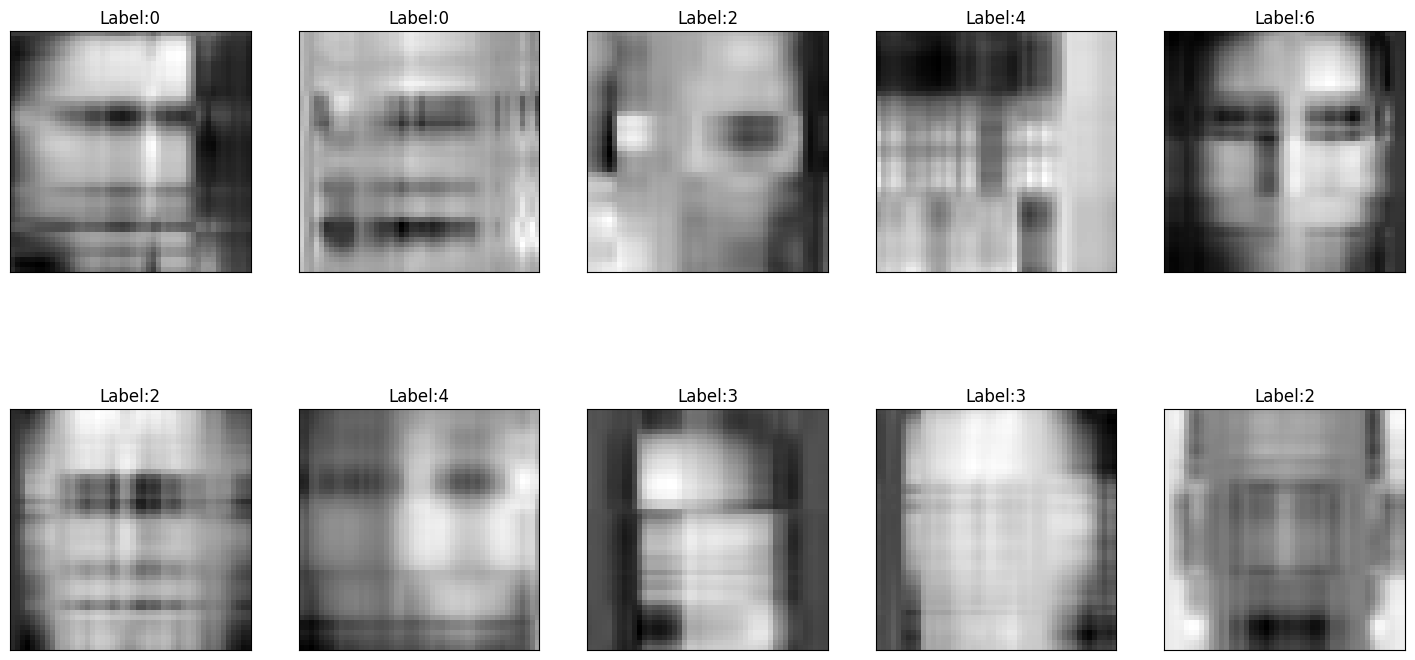

In [13]:
## visualizing here
images_pca.shape
show_img(images_pca, labels)

### **Question 2**: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [14]:
## determine the optimal number of PCs here
scaler = MinMaxScaler()
optimal = [0] * 25
pca = PCA()
threshold = 0.95
for i in range(len(images)):
  im = scaler.fit_transform(images[i])
  im = pca.fit(im)
  explained_variance = pca.explained_variance_
  cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))
  optimal_num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
  optimal[optimal_num_components] += 1

for i in range(len(optimal)):
  print(f'Số lượng thành phần chính tối ưu là {i} : {optimal[i]}')

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22460\200585823.py:10: RuntimeWarning: invalid value encountered in divide
  cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22460\200585823.py:10: RuntimeWarning: invalid value encountered in divide
  cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  exp

Số lượng thành phần chính tối ưu là 0 : 0
Số lượng thành phần chính tối ưu là 1 : 13
Số lượng thành phần chính tối ưu là 2 : 5
Số lượng thành phần chính tối ưu là 3 : 11
Số lượng thành phần chính tối ưu là 4 : 48
Số lượng thành phần chính tối ưu là 5 : 173
Số lượng thành phần chính tối ưu là 6 : 685
Số lượng thành phần chính tối ưu là 7 : 1813
Số lượng thành phần chính tối ưu là 8 : 3779
Số lượng thành phần chính tối ưu là 9 : 6128
Số lượng thành phần chính tối ưu là 10 : 7352
Số lượng thành phần chính tối ưu là 11 : 6426
Số lượng thành phần chính tối ưu là 12 : 4639
Số lượng thành phần chính tối ưu là 13 : 2646
Số lượng thành phần chính tối ưu là 14 : 1289
Số lượng thành phần chính tối ưu là 15 : 543
Số lượng thành phần chính tối ưu là 16 : 181
Số lượng thành phần chính tối ưu là 17 : 74
Số lượng thành phần chính tối ưu là 18 : 39
Số lượng thành phần chính tối ưu là 19 : 21
Số lượng thành phần chính tối ưu là 20 : 8
Số lượng thành phần chính tối ưu là 21 : 6
Số lượng thành phần chính 

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

### **Prepare Data**

In [15]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

In [16]:
# data source theo cách xử lý cho toàn tập
scaler = MinMaxScaler()
pca = PCA(n_components = 12)

trainX_flat = scaler.fit_transform(trainX.reshape(len(trainX), 48*48))
testX_flat = scaler.transform(testX.reshape(len(testX), 48*48))

trainX_processed = pca.fit_transform(trainX_flat)
testX_processed = pca.transform(testX_flat)

In [17]:
def pca_scale(images: np.ndarray, images2: np.ndarray):
    scaler = MinMaxScaler()
    result = np.zeros(shape=(len(images), 48, 48))
    result2 = np.zeros(shape=(len(images), 48, 48))
    for i in range(len(images)):
        im_scaled = scaler.fit_transform(images[i])
        result[i] = im_scaled
        
    for i in range(len(images2)):
        im_scaled = scaler.fit_transform(images[i])
        result2[i] = im_scaled

    return result, result2


### **MLP Model**

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Định nghĩa MLPClassifier
mlp = MLPClassifier()

#### Original data

In [13]:
# Huấn luyện mô hình
mlp.fit(trainX_flat, trainY)


# Dự đoán trên tập kiểm tra
y_pred = mlp.predict(testX_flat)

# Đánh giá mô hình
print(classification_report(testY, y_pred))

d:\School\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.32      0.12      0.17       985
           1       0.35      0.16      0.22       102
           2       0.25      0.28      0.27      1043
           3       0.50      0.56      0.53      1765
           4       0.29      0.24      0.26      1210
           5       0.50      0.51      0.50       795
           6       0.31      0.46      0.37      1278

    accuracy                           0.37      7178
   macro avg       0.36      0.33      0.33      7178
weighted avg       0.37      0.37      0.36      7178



#### Processed data

In [14]:
# Huấn luyện mô hình
mlp.fit(trainX_processed, trainY)


# Dự đoán trên tập kiểm tra
y_pred = mlp.predict(testX_processed)

# Đánh giá mô hình
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.16      0.20       985
           1       0.11      0.01      0.02       102
           2       0.27      0.22      0.24      1043
           3       0.33      0.52      0.40      1765
           4       0.30      0.26      0.28      1210
           5       0.32      0.29      0.31       795
           6       0.30      0.28      0.29      1278

    accuracy                           0.31      7178
   macro avg       0.27      0.25      0.25      7178
weighted avg       0.30      0.31      0.30      7178



d:\School\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(multi_class="auto", penalty = "l2", fit_intercept= True ,solver = "saga", n_jobs = -1)

#### Original data

In [16]:
# Huấn luyện mô hình
logreg.fit(trainX_flat, trainY)


# Dự đoán trên tập kiểm tra
y_pred = logreg.predict(testX_flat)

# Đánh giá mô hình
print(classification_report(testY, y_pred))

d:\School\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.28      0.19      0.23       985
           1       0.57      0.08      0.14       102
           2       0.26      0.18      0.22      1043
           3       0.43      0.63      0.51      1765
           4       0.27      0.26      0.27      1210
           5       0.49      0.46      0.47       795
           6       0.34      0.32      0.33      1278

    accuracy                           0.36      7178
   macro avg       0.38      0.31      0.31      7178
weighted avg       0.35      0.36      0.35      7178



d:\School\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Processed data

In [17]:
# Huấn luyện mô hình
logreg.fit(trainX_processed, trainY)


# Dự đoán trên tập kiểm tra
y_pred = logreg.predict(testX_processed)

# Đánh giá mô hình
print(classification_report(testY, y_pred))

d:\School\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.21      0.04      0.07       985
           1       0.00      0.00      0.00       102
           2       0.20      0.02      0.04      1043
           3       0.28      0.73      0.40      1765
           4       0.27      0.22      0.24      1210
           5       0.30      0.19      0.23       795
           6       0.30      0.18      0.23      1278

    accuracy                           0.28      7178
   macro avg       0.22      0.20      0.17      7178
weighted avg       0.26      0.28      0.22      7178



d:\School\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\School\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\School\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **SVM Model**

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC()

#### Original data

In [20]:
# Huấn luyện mô hình
svm.fit(trainX_flat, trainY)

# Dự đoán trên tập kiểm tra
y_pred = svm.predict(testX_flat)

# Đánh giá mô hình

print("SVM on original data")
print(classification_report(testY, y_pred))

SVM on original data
              precision    recall  f1-score   support

           0       0.43      0.24      0.31       985
           1       1.00      0.07      0.13       102
           2       0.40      0.24      0.30      1043
           3       0.48      0.73      0.58      1765
           4       0.34      0.40      0.37      1210
           5       0.64      0.50      0.56       795
           6       0.42      0.42      0.42      1278

    accuracy                           0.44      7178
   macro avg       0.53      0.37      0.38      7178
weighted avg       0.45      0.44      0.43      7178



#### Processed data

In [21]:
# Huấn luyện mô hình
svm.fit(trainX_processed, trainY)

# Dự đoán trên tập kiểm tra
y_pred = svm.predict(testX_processed)

# Đánh giá mô hình
print("SVM on PCA-processed data")
print(classification_report(testY, y_pred))

SVM on PCA-processed data
              precision    recall  f1-score   support

           0       0.31      0.06      0.11       985
           1       0.00      0.00      0.00       102
           2       0.28      0.09      0.13      1043
           3       0.30      0.75      0.43      1765
           4       0.31      0.25      0.28      1210
           5       0.37      0.24      0.29       795
           6       0.37      0.22      0.27      1278

    accuracy                           0.31      7178
   macro avg       0.28      0.23      0.22      7178
weighted avg       0.32      0.31      0.27      7178



C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

### **Random Forest Classifier**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)


#### Original data

In [23]:
# Train the model
model.fit(trainX_flat, trainY)

# Prediction on test set
y_pred = model.predict(testX_flat)

# Classification report
print(classification_report(testY, y_pred))
# model.fit(trainX_pca_shape, trainY)

              precision    recall  f1-score   support

           0       0.58      0.19      0.28       985
           1       1.00      0.25      0.39       102
           2       0.56      0.26      0.35      1043
           3       0.43      0.82      0.56      1765
           4       0.38      0.37      0.37      1210
           5       0.67      0.56      0.61       795
           6       0.44      0.39      0.41      1278

    accuracy                           0.46      7178
   macro avg       0.58      0.40      0.43      7178
weighted avg       0.50      0.46      0.44      7178



#### Processed data

In [24]:
# Train the model
model.fit(trainX_processed, trainY)

# Prediction on test set
y_pred_pca = model.predict(testX_processed)

# Classification report
print(classification_report(testY, y_pred_pca))

              precision    recall  f1-score   support

           0       0.52      0.18      0.27       985
           1       0.88      0.14      0.24       102
           2       0.50      0.22      0.31      1043
           3       0.33      0.74      0.46      1765
           4       0.35      0.30      0.32      1210
           5       0.59      0.42      0.49       795
           6       0.40      0.27      0.32      1278

    accuracy                           0.38      7178
   macro avg       0.51      0.32      0.34      7178
weighted avg       0.43      0.38      0.36      7178



### **Naive Bayes**

In [39]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming labels is a 1D array of shape (n_samples,)
# Reshape it to (n_samples, 1) for single-output classification
labels = labels.reshape(-1, 1)

trainX_processed = pca.fit_transform(trainX_flat)
testX_processed = pca.transform(testX_flat)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Wrap the classifier with MultiOutputClassifier for multi-output classification
multi_target_nb = MultiOutputClassifier(nb, n_jobs=-1)

# Fit the model on the original data
multi_target_nb.fit(trainX_flat, trainY)

# Predict on the test set
y_pred = multi_target_nb.predict(testX_flat)

# Evaluate the model
print("Classification Report for original data:")
print(classification_report(testY, y_pred))

# Fit the model on the PCA-transformed data
multi_target_nb.fit(trainX_processed, trainY)

# Predict on the PCA test set
y_pred_pca = multi_target_nb.predict(testX_processed)

# Evaluate the model with PCA data
print("\nClassification Report for PCA-transformed data:")
print(classification_report(testY, y_pred_pca))

ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [28]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming labels is a 1D array of shape (n_samples,)
# Reshape it to (n_samples, 1) for single-output classification
labels = labels.reshape(-1, 1)

trainX_processed = pca.fit_transform(trainX_flat)
testX_processed = pca.transform(testX_flat)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Wrap the classifier with MultiOutputClassifier for multi-output classification
multi_target_nb = MultiOutputClassifier(nb, n_jobs=-1)


#### Original data

In [29]:
# Fit the model on the original data
multi_target_nb.fit(trainX_flat, trainY)

# Predict on the test set
y_pred = multi_target_nb.predict(testX_flat)

# Evaluate the model
print("Classification Report for original data:")
print(classification_report(testY, y_pred))

ValueError: y must have at least two dimensions for multi-output regression but has only one.

#### Processed data

In [30]:
# Fit the model on the PCA-transformed data
multi_target_nb.fit(trainX_processed, trainY)

# Predict on the PCA test set
y_pred_pca = multi_target_nb.predict(testX_processed)

# Evaluate the model with PCA data
print("\nClassification Report for PCA-transformed data:")
print(classification_report(testY, y_pred_pca))

ValueError: y must have at least two dimensions for multi-output regression but has only one.

### **Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


model = DecisionTreeClassifier(max_depth=15, random_state=42)

#### Original data

In [32]:
# Fit the model on the original data
model.fit(trainX_flat, trainY)

# Predict on the test set
y_pred = model.predict(testX_flat)

# Evaluate the model
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.21      0.22       985
           1       0.18      0.12      0.14       102
           2       0.24      0.24      0.24      1043
           3       0.41      0.43      0.42      1765
           4       0.26      0.28      0.27      1210
           5       0.42      0.38      0.40       795
           6       0.27      0.28      0.28      1278

    accuracy                           0.31      7178
   macro avg       0.29      0.28      0.28      7178
weighted avg       0.31      0.31      0.31      7178



#### Processed data

In [33]:
# Fit the model on the processed data
model.fit(trainX_processed, trainY)

# Predict on the processed test set
y_pred_pca = model.predict(testX_processed)

# Evaluate the model with PCA data
print(classification_report(testY, y_pred_pca))

              precision    recall  f1-score   support

           0       0.25      0.21      0.23       985
           1       0.33      0.24      0.28       102
           2       0.27      0.23      0.25      1043
           3       0.33      0.48      0.39      1765
           4       0.25      0.22      0.24      1210
           5       0.39      0.31      0.34       795
           6       0.28      0.24      0.26      1278

    accuracy                           0.30      7178
   macro avg       0.30      0.28      0.28      7178
weighted avg       0.29      0.30      0.29      7178



### **GridSearchCV**

- Because the datasets are quite large, we will use a **subset** of the training data for each model.
- We will also use `RandomizedSearchCV` instead of `GridSearchCV` to limit the range and number of hyperparameters we are tuning. **RandomizedSearchCV** is an alternative to GridSearchCV that samples a fixed number of hyperparameter combinations from a specified distribution.
- Parallelize the Process

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Use a subset of the training data for hyperparameter tuning
subset_size = 5000  # Adjust this as needed
trainX_subset = trainX_flat[:subset_size]
trainY_subset = trainY[:subset_size]

trainX_processed_subset = trainX_processed[:subset_size]
trainY_processed_subset = trainY[:subset_size]

# Define parameter grids
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': np.logspace(-4, -1, 10),
    'learning_rate': ['constant','adaptive'],
}

logistic_param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

svm_param_grid = {
    'C': np.logspace(-2, 1, 10),
    'gamma': np.logspace(-3, 0, 10),
    'kernel': ['rbf', 'poly', 'sigmoid'],
}

rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}



#### **Apply RandomizedSearchCV for MLP**

In [36]:
from sklearn.neural_network import MLPClassifier

# Apply RandomizedSearchCV for MLP
mlp = MLPClassifier(max_iter=100)
mlp_random_search = RandomizedSearchCV(mlp, mlp_param_grid, n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42)

##### Original data

In [37]:

mlp_random_search.fit(trainX_subset, trainY_subset)
print("Best parameters for MLP:", mlp_random_search.best_params_)
y_pred = mlp_random_search.predict(testX_flat)
print("MLP on original data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for MLP: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.046415888336127774, 'activation': 'tanh'}
MLP on original data after RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.27      0.12      0.16       985
           1       0.00      0.00      0.00       102
           2       0.22      0.19      0.20      1043
           3       0.43      0.65      0.52      1765
           4       0.30      0.26      0.28      1210
           5       0.41      0.47      0.44       795
           6       0.33      0.32      0.33      1278

    accuracy                           0.36      7178
   macro avg       0.28      0.29      0.28      7178
weighted avg       0.33      0.36      0.33      7178



C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\m

##### Processed data

In [38]:
# Apply RandomizedSearchCV for MLP on PCA-processed data
mlp_random_search.fit(trainX_processed_subset, trainY_processed_subset)
print("Best parameters for MLP on PCA-processed data:", mlp_random_search.best_params_)
y_pred = mlp_random_search.predict(testX_processed)
print("MLP on PCA-processed data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for MLP on PCA-processed data: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.046415888336127774, 'activation': 'tanh'}
MLP on PCA-processed data after RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.25      0.07      0.10       985
           1       0.00      0.00      0.00       102
           2       0.18      0.09      0.12      1043
           3       0.29      0.66      0.40      1765
           4       0.27      0.22      0.24      1210
           5       0.27      0.16      0.20       795
           6       0.29      0.22      0.25      1278

    accuracy                           0.28      7178
   macro avg       0.22      0.20      0.19      7178
weighted avg       0.26      0.28      0.24      7178



C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\m

#### **Apply RandomizedSearchCV for Logistic Regression**

In [45]:
# Apply RandomizedSearchCV for Logistic Regression
logistic = LogisticRegression(max_iter=200)
logistic_random_search = RandomizedSearchCV(logistic, logistic_param_grid, n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42)

##### Original data

In [46]:
logistic_random_search.fit(trainX_subset, trainY_subset)
print("Best parameters for Logistic Regression:", logistic_random_search.best_params_)
y_pred = logistic_random_search.predict(testX_flat)
print("Logistic Regression on original data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': 0.03359818286283781}
Logistic Regression on original data after RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.26      0.13      0.18       985
           1       0.00      0.00      0.00       102
           2       0.24      0.15      0.18      1043
           3       0.41      0.67      0.51      1765
           4       0.27      0.29      0.28      1210
           5       0.46      0.42      0.44       795
           6       0.32      0.29      0.31      1278

    accuracy                           0.35      7178
   macro avg       0.28      0.28      0.27      7178
weighted avg       0.33      0.35      0.33      7178



C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##### Processed data

In [47]:
# Apply RandomizedSearchCV for Logistic Regression on PCA-processed data
logistic_random_search.fit(trainX_processed_subset, trainY_processed_subset)
print("Best parameters for Logistic Regression on PCA-processed data:", logistic_random_search.best_params_)
y_pred = logistic_random_search.predict(testX_processed)
print("Logistic Regression on PCA-processed data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Logistic Regression on PCA-processed data: {'solver': 'saga', 'penalty': 'l2', 'C': 0.004832930238571752}
Logistic Regression on PCA-processed data after RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.18      0.03      0.05       985
           1       0.00      0.00      0.00       102
           2       0.15      0.03      0.05      1043
           3       0.28      0.76      0.41      1765
           4       0.27      0.21      0.24      1210
           5       0.33      0.15      0.21       795
           6       0.30      0.17      0.22      1278

    accuracy                           0.28      7178
   macro avg       0.22      0.19      0.17      7178
weighted avg       0.25      0.28      0.22      7178



C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

#### **Apply RandomizedSearchCV for SVM**

##### Original data

In [ ]:
svm = SVC()
svm_random_search = RandomizedSearchCV(svm, svm_param_grid, n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42)
svm_random_search.fit(trainX_subset, trainY_subset)
print("Best parameters for SVM:", svm_random_search.best_params_)
y_pred = svm_random_search.predict(testX_flat)
print("SVM on original data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

##### Processed data

In [ ]:
# Apply RandomizedSearchCV for SVM on PCA-processed data
svm_random_search.fit(trainX_processed_subset, trainY_processed_subset)
print("Best parameters for SVM on PCA-processed data:", svm_random_search.best_params_)
y_pred = svm_random_search.predict(testX_processed)
print("SVM on PCA-processed data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

#### **Apply RandomizedSearchCV for Random Forest**

In [ ]:
# Apply RandomizedSearchCV for Random Forest
rf = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42)

##### Original data

In [ ]:
rf_random_search.fit(trainX_subset, trainY_subset)
print("Best parameters for Random Forest:", rf_random_search.best_params_)
y_pred = rf_random_search.predict(testX_flat)
print("Random Forest on original data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

##### Processed data

In [ ]:
# Apply RandomizedSearchCV for Random Forest on PCA-processed data
rf_random_search.fit(trainX_processed_subset, trainY_processed_subset)
print("Best parameters for Random Forest on PCA-processed data:", rf_random_search.best_params_)
y_pred = rf_random_search.predict(testX_processed)
print("Random Forest on PCA-processed data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

#### **Apply RandomizedSearchCV for Decision Tree**

In [ ]:
# Apply RandomizedSearchCV for Decision Tree
dt = DecisionTreeClassifier()
dt_random_search = RandomizedSearchCV(dt, dt_param_grid, n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42)

##### Original data

In [ ]:
dt_random_search.fit(trainX_subset, trainY_subset)
print("Best parameters for Decision Tree:", dt_random_search.best_params_)
y_pred = dt_random_search.predict(testX_flat)
print("Decision Tree on original data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

##### Processed data

In [ ]:
# Apply RandomizedSearchCV for Decision Tree on PCA-processed data
dt_random_search.fit(trainX_processed_subset, trainY_processed_subset)
print("Best parameters for Decision Tree on PCA-processed data:", dt_random_search.best_params_)
y_pred = dt_random_search.predict(testX_processed)
print("Decision Tree on PCA-processed data after RandomizedSearchCV")
print(classification_report(testY, y_pred))

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [18]:
## visualize the confusion matrices and classification reports here